In [1]:
import pandas as pd 

df = pd.read_csv("banknotes.csv")

print(df.head())


   conterfeit  Length   Left  Right  Bottom   Top  Diagonal
0           0   214.8  131.0  131.1     9.0   9.7     141.0
1           0   214.6  129.7  129.7     8.1   9.5     141.7
2           0   214.8  129.7  129.7     8.7   9.6     142.2
3           0   214.8  129.7  129.6     7.5  10.4     142.0
4           0   215.0  129.6  129.7    10.4   7.7     141.8


#Using Box Plots for Outlier Detection 

Text(0.5, 1.0, 'Boxplot of Swiss Banknote Length ')

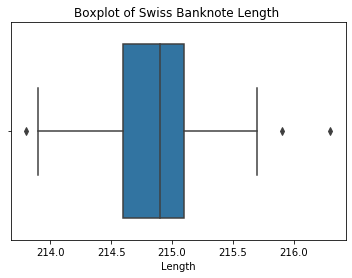

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df,x=df["Length"])
plt.title("Boxplot of Swiss Banknote Length ")

In [11]:
from collections import Counter
df_outlier1 = df[df['Length']> 216].copy()
print(Counter(df_outlier1['conterfeit']))

df_outlier2 = df[df['Length']> 215.5].copy()
print(Counter(df_outlier2['conterfeit']))

Counter({1: 1})
Counter({0: 7, 1: 3})


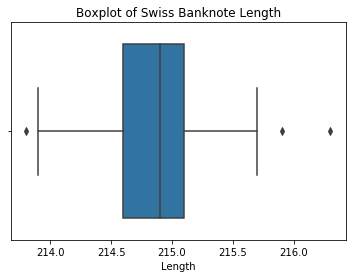

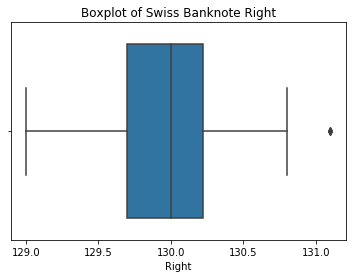

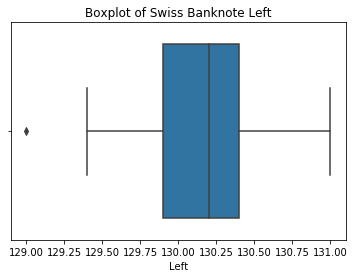

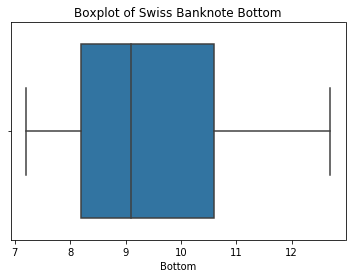

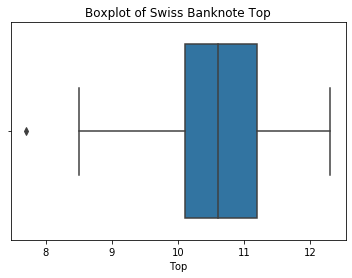

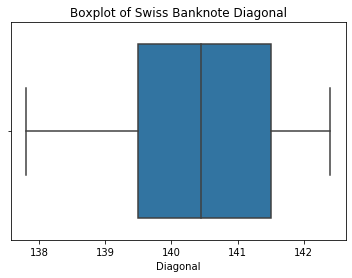

In [20]:
def boxplot(column):
    sns.boxplot(data=df,x=df[f"{column}"])
    plt.title(f"Boxplot of Swiss Banknote {column}")
    plt.show()
    
boxplot('Length')
boxplot('Right')
boxplot('Left')
boxplot('Bottom')
boxplot('Top')
boxplot('Diagonal')


In [ ]:
# df_outlier3 = df[(df['Length']> 215)&(df['Right']> 130)&(df['Left']> 
130)&(df['Bottom']> 10)].copy()
print(Counter(df_outlier3['conterfeit']))

 Using Isolation Forests for Outlier Detection 

In [42]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import numpy as np
X = df[['Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']]
y = df['conterfeit']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.33, random_state=42)


In [41]:
clf = IsolationForest(random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_test)
pred = pd.DataFrame({'pred': y_pred})
pred['y_pred'] = np.where(pred['pred'] == -1, 1, 0)
y_pred = pred['y_pred'] 
print("Precision:", precision_score(y_test, y_pred))

Precision: 0.625


Using OneClassSVM for Outlier Detection 

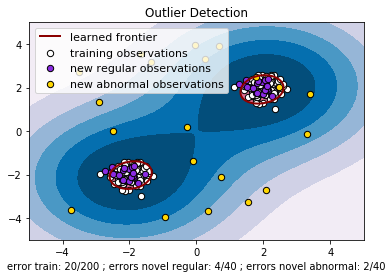

In [43]:
#Using OneClassSVM for Outlier Detection 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Outlier Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()
